<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/2023_11_28_Doctor_Who.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Reset the environment
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_episodes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-28/drwho_episodes.csv', delimiter= ',')
df_directors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-28/drwho_directors.csv', delimiter= ',')
df_writers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-28/drwho_writers.csv', delimiter= ',')

In [ ]:
print(df_episodes.head())
print(df_directors.head())
print(df_writers.head())

In [ ]:
df_episodes.info()
df_directors.info()
df_writers.info()

In [11]:
# Merge directors and writers on 'story_number'
df = pd.merge(df_directors, df_writers, on='story_number', how='outer', suffixes=('_director', '_writer'))

In [13]:
# Merge the result with episodes on 'story_number'
df = pd.merge(df, df_episodes, on='story_number', how='outer')

In [15]:
# Sort the DataFrame by 'story_number'
df = df.sort_values(by='story_number')

In [17]:
# Reset index
df = df.reset_index(drop=True)

In [19]:
print(df)

    story_number            director            writer      era  \
0            157          Keith Boak  Russell T Davies  revived   
1            158           Euros Lyn  Russell T Davies  revived   
2            159           Euros Lyn       Mark Gatiss  revived   
3           160a          Keith Boak  Russell T Davies  revived   
4           160b          Keith Boak  Russell T Davies  revived   
..           ...                 ...               ...      ...   
181         297f        Azhur Saleem    Chris Chibnall  revived   
182          298      Annetta Laufer    Chris Chibnall  revived   
183          299          Haolu Wang         Ella Road  revived   
184          299          Haolu Wang    Chris Chibnall  revived   
185          300  Jamie Magnus Stone    Chris Chibnall  revived   

     season_number serial_title  episode_number             episode_title  \
0              1.0          NaN             1.0                      Rose   
1              1.0          NaN          

In [41]:
# Separate columns for multiple lines chart
df_1 = df[['episode_title', 'uk_viewers', 'rating', 'duration']]

In [42]:
# Melt the DataFrame for easier plotting
melted_df = pd.melt(df_1, id_vars='episode_title', var_name='Lines', value_name='Values')

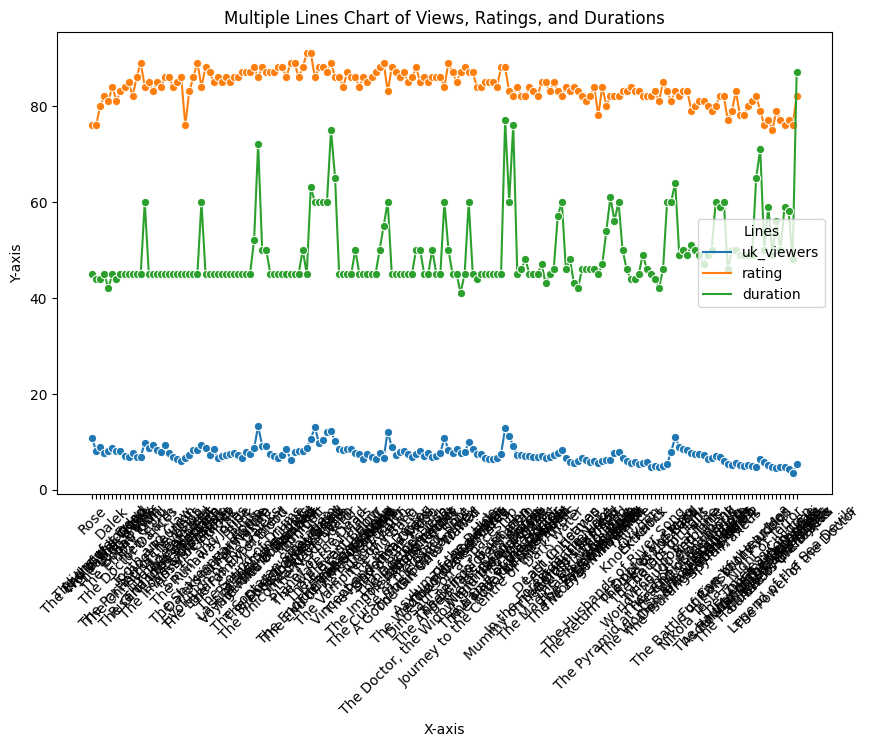

In [67]:
# Plot multiple lines using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='episode_title', y='Values', hue='Lines', data=melted_df, marker='o')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Lines Chart of Views, Ratings, and Durations')
plt.xticks(rotation= 45)
# Show the plot
plt.show()

In [44]:
# Calculate the correlation matrix
correlation_matrix = df[['uk_viewers', 'rating', 'duration']].corr()
print(correlation_matrix)

            uk_viewers    rating  duration
uk_viewers    1.000000  0.488264  0.343302
rating        0.488264  1.000000 -0.071328
duration      0.343302 -0.071328  1.000000


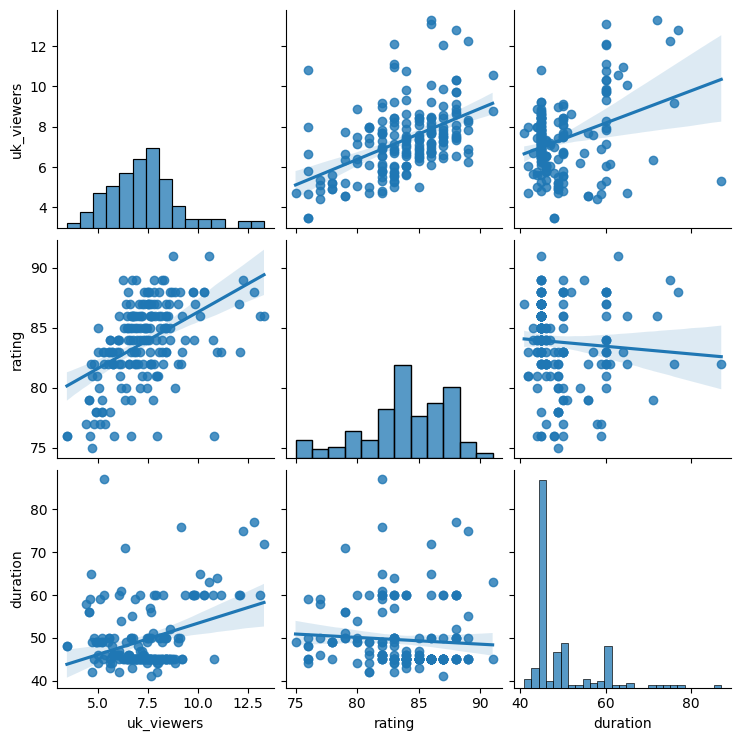

In [45]:
# Create a scatter plot with regression lines
sns.pairplot(df[['uk_viewers', 'rating', 'duration']], kind='reg')
# Show the plot
plt.show()

Intepretation: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6

In [58]:
high_rated_directors = df[df['rating'] >= 80]
print(high_rated_directors[['director', 'rating', 'duration']].drop_duplicates().sort_values('rating', ascending=False))

           director  rating  duration
54    Graeme Harper      91        63
53    Graeme Harper      91        45
61        Euros Lyn      89        75
74      Toby Haynes      89        55
49        Euros Lyn      89        45
..              ...     ...       ...
158    Jamie Childs      80        49
131  Rachel Talalay      80        54
160       Wayne Yip      80        60
155    Jamie Childs      80        50
2         Euros Lyn      80        44

[138 rows x 3 columns]


In [62]:
print(high_rated_directors['duration'].mean())

49.25153374233129


In [66]:
# Identify the top ten most viewed episodes
top_ten_episodes = df.nlargest(10, 'uk_viewers')
# Print out the top ten episodes
print(top_ten_episodes[['episode_title', 'director', 'uk_viewers', 'rating']])

                              episode_title          director  uk_viewers  \
41                     Voyage of the Damned      James Strong       13.31   
55                          The Next Doctor      Andy Goddard       13.10   
104                   The Day of the Doctor       Nick Hurran       12.80   
61               The End of Time – Part Two         Euros Lyn       12.27   
75                        A Christmas Carol       Toby Haynes       12.11   
60               The End of Time – Part One         Euros Lyn       12.04   
105                  The Time of the Doctor       Jamie Payne       11.14   
149             The Woman Who Fell to Earth      Jamie Childs       10.96   
0                                      Rose        Keith Boak       10.81   
89   The Doctor, the Widow and the Wardrobe  Farren Blackburn       10.77   

     rating  
41       86  
55       86  
104      88  
61       89  
75       83  
60       87  
105      83  
149      83  
0        76  
89       84 